<h2>Python 3.6.9</h2>

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
import itertools
import json
from collections import Counter
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [2]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 2000)

In [3]:
#import import_ipynb
from metric_util_func_py import *

In [4]:
# a = [2,2,3,3,3,4,4,5,5,6,6,6,6,6,7,7,77,7,7,8]
# draw_bar_graph(a, text=True,print_bin=True)

In [5]:
%matplotlib inline

In [6]:
folder="../dataset_v5/v5_2/v5_2_2/"

In [7]:
save_dir = "graphs_v5_2_7_2"

In [8]:
#mod_ment2_1 = pd.read_csv(folder+'v5_2_2/'+'final_shodhganga_dataset_v5_2_5.csv', sep =",")

In [9]:
mod_ment2 = pd.read_csv(folder+'final_shodhganga_dataset_v5_2_7_2.csv', sep =",")

In [32]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1', 'ddc_code', 'advisor_advId',
       'researcher_resId'],
      dtype='object')

In [38]:
mod_ment2[mod_ment2["advId"]==53252]

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,...,new_date_awarded,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative,N_DepartmentId_1,ddc_code,advisor_advId,researcher_resId
111684,53252,199071,53252,53249,"Vasudevan, T.","Subramanian, A.",department of industrial chemistry,D1888,Alagappa University,I333,...,1998-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Subramanian, A.@53249"
111685,53252,53267,53252,53267,"Vasudevan, T.","Muralidharan, B.",department of industrial chemistry,D1888,Alagappa University,I333,...,1996-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Muralidharan, B.@53267"
111686,53252,198907,53252,198907,"Vasudevan, T.","Indumathi, SN",department of chemistry,D1888,Alagappa University,I333,...,2012-07-20,2012-07-20,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1331,"('500', '540')","Vasudevan, T.@53252","Indumathi, SN@198907"
111687,53252,198971,53252,198971,"Vasudevan, T.","Shakkthivel, P.",department of industrial chemistry,D1888,Alagappa University,I333,...,2000-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Shakkthivel, P.@198971"
111688,53252,198972,53252,198972,"Vasudevan, T.","Srinivasan, R.",department of industrial chemistry,D1888,Alagappa University,I333,...,2007-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Srinivasan, R.@198972"
111689,53252,198979,53252,198979,"Vasudevan, T.","Lajapathi Rai, C.",department of industrial chemistry,D1888,Alagappa University,I333,...,2007-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Lajapathi Rai, C.@198979"
111690,53252,198980,53252,198980,"Vasudevan, T.","Umamaheswari, S.",department of industrial chemistry,D1888,Alagappa University,I333,...,2000-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Umamaheswari, S.@198980"
111691,53252,198983,53252,198983,"Vasudevan, T.","Venkataraman, S.",department of industrial chemistry,D1888,Alagappa University,I333,...,2005-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Venkataraman, S.@198983"
111692,53252,198985,53252,198985,"Vasudevan, T.","Sathiya Narayanan, R.",department of industrial chemistry,D1888,Alagappa University,I333,...,2004-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Sathiya Narayanan, R.@198985"
111693,53252,198991,53252,198991,"Vasudevan, T.","Ramesh, D.",department of industrial chemistry,D1888,Alagappa University,I333,...,2004-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Ramesh, D.@198991"


In [10]:
#mod_ment2 = pd.read_csv(folder+'final_shodhganga_dataset_v5_2.csv', sep =",")

In [11]:
mod_ment2.shape

(201477, 24)

In [12]:
graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','publisher_institution', create_using=nx.DiGraph())
graph1.remove_edges_from(nx.selfloop_edges(graph1))
cycle=list(nx.simple_cycles(graph1))
graph1.remove_edges_from(cycle)

In [13]:
len(graph1.nodes())

256725

In [14]:
len(graph1.edges())

201250

In [15]:
components1 = list(nx.weakly_connected_components(graph1))

In [16]:
len(components1)

56935

In [17]:
components1.sort(key=len, reverse=True)

In [18]:
components1_Size=[len(c) for c in components1]

In [19]:
gneq_10 = [c for c in components1 if len(c)>=10]
nodes_10 = [node for c in gneq_10 for node in c]
sub_graph_geq10 = graph1.subgraph(nodes_10)
print(len(sub_graph_geq10.nodes())/len(graph1.nodes()))
print(len(sub_graph_geq10.edges())/len(graph1.edges()))

0.37594312980816047
0.4648894409937888


In [20]:
#nx.write_graphml_lxml(sub_graph_geq10, "sub_graph_geq10.graphml")

In [20]:
len(gneq_10)/56935

0.07441819618863617

In [22]:
components1_dist = Counter(components1_Size)

In [23]:
sorted_components1_dist = dict(sorted(components1_dist.items(), key=lambda item: item[1],  reverse=True))

In [24]:
avg_comp_size=sum(components1_Size)/len(components1_Size)

In [25]:
avg_comp_size

4.509089312373759

In [26]:
components1_Size[:10]

[1356, 697, 670, 666, 652, 626, 400, 365, 329, 276]

In [66]:
sorted_components1_dist[1]

87

In [26]:
# comp_10 ={}
# nodes_10 = []
# for a in sorted_components1_dist:
#     if a >= 10:
#         comp_10[a]=sorted_components1_dist[a]
#         nodes_10.append(sorted_components1_dist[a]*a)
# print(sum(comp_10.values())/sum(sorted_components1_dist.values()))
# print(sum(nodes_10)/len(graph1.nodes()))

In [27]:
sorted_components1_dist[2]/len(components1)

0.5244225871607974

In [28]:
sum(sorted_components1_dist.values())

56935

In [29]:
list(sorted_components1_dist.values())[0:8]

[29858, 9699, 4917, 2956, 1949, 1462, 995, 775]

In [30]:
sum(list(sorted_components1_dist.values())[0:8])/sum(sorted_components1_dist.values())

0.9240537454992536

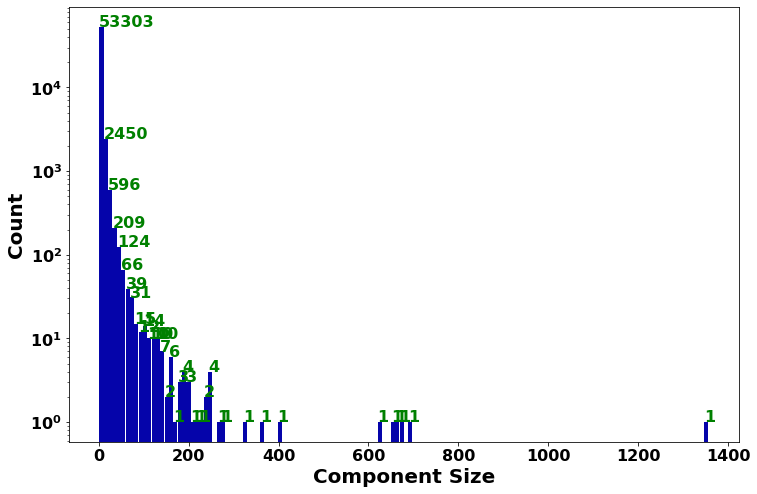

[5.3303e+04 2.4500e+03 5.9600e+02 2.0900e+02 1.2400e+02 6.6000e+01
 3.9000e+01 3.1000e+01 1.5000e+01 1.2000e+01 1.4000e+01 1.0000e+01
 1.0000e+01 1.0000e+01 7.0000e+00 2.0000e+00 6.0000e+00 1.0000e+00
 3.0000e+00 4.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 2.0000e+00 4.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

In [27]:
draw_bar_graph(components1_Size,title='',ylabel='Count',xlabel='Component Size',loc="../"+save_dir+"/WeaklyConnectedComponentDistributionHist1.pdf",bins=41, text=True)

In [30]:
#draw_line_graph(components1_dist,title='',ylabel='Component Count',xlabel='Component Size',loc="../new_graphs/WeaklyConnectedComponentDistributionLine1.svg")

In [30]:
#components1_dist_sort

In [31]:
def save_df(df_name,df, folder1 = "../"):
    df.to_csv(folder1+"top_10/researcher_level/"+df_name+".csv", index=False)
    print(f"file saved as: {folder1}top_10/researcher_level/{df_name}.csv")
    return

In [21]:
top=5

<h2> Fecundity Distribution : </h2> 

In [22]:
out_dgr = graph1.out_degree()

In [23]:
out_dgr = dict(out_dgr)

In [35]:
out_dgr[53252]

44

In [20]:
out_dgr_dist = Counter(out_dgr.values())

In [24]:
#out_dgr_dist

In [35]:
avg_fecun = sum(list(out_dgr.values()))/len(list(out_dgr.values()))
avg_fecun

0.7839127471029311

In [37]:
#out_dgr_dist

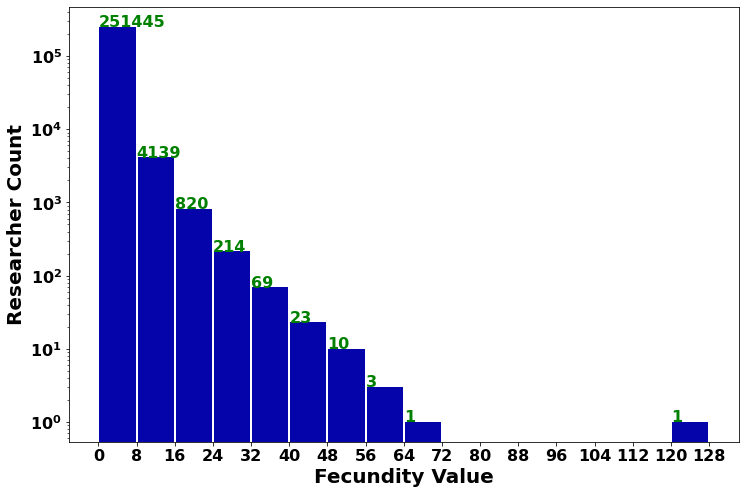

[2.51445e+05 4.13900e+03 8.20000e+02 2.14000e+02 6.90000e+01 2.30000e+01
 1.00000e+01 3.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
[  0.   8.  16.  24.  32.  40.  48.  56.  64.  72.  80.  88.  96. 104.
 112. 120. 128.]


In [37]:
draw_bar_graph(list(out_dgr.values()),title='',ylabel='Researcher Count',xlabel='Fecundity Value',loc="../"+save_dir+"/FecundityDistributionHist1.pdf", bins=16, text=True,print_bin=True)

In [47]:
sorted_fecundity = dict(sorted(out_dgr.items(), key=lambda item: item[1],reverse=True))##save for dashboard

In [49]:
top_5_fecun= list(sorted_fecundity.keys())[:top]

In [52]:
top_5_values = list(sorted_fecundity.values())[:top]

In [53]:
top_5_detail=get_names_inst_dept(mod_ment2,top_5_fecun,'advId')

In [54]:
top_5_detail = top_5_detail[["advisor_name","publisher_institution"]]

In [56]:
top_5_detail["Fecundity_count"]=top_5_values

In [57]:
top_5_detail

,advisor_name,publisher_institution,Fecundity_count
advId,,,
144109,"S, Mohan",University of Madras; Alagappa University,128
88147,"Shinde, Gb",Dr. Babasaheb Ambedkar Marathwada University,66
71191,"Pullaiah, T.",Sri Krishnadevaraya University,63
88399,"Nagabhushanam,",Dr. Babasaheb Ambedkar Marathwada University,62
26894,"Bhattacharjee, Tapodhir",Assam University,58


In [58]:
print(top_5_detail.to_latex(index=False))

\begin{tabular}{llr}
\toprule
            advisor\_name &                         publisher\_institution &  Fecundity\_count \\
                S, Mohan &     University of Madras; Alagappa University &              128 \\
\midrule
              Shinde, Gb &  Dr. Babasaheb Ambedkar Marathwada University &               66 \\
            Pullaiah, T. &                Sri Krishnadevaraya University &               63 \\
          Nagabhushanam, &  Dr. Babasaheb Ambedkar Marathwada University &               62 \\
 Bhattacharjee, Tapodhir &                              Assam University &               58 \\
\bottomrule
\end{tabular}



In [59]:
#save_df("researcher_fecundity", top_5_detail)

In [60]:
#save_obj('fecundity_dist',out_dgr)

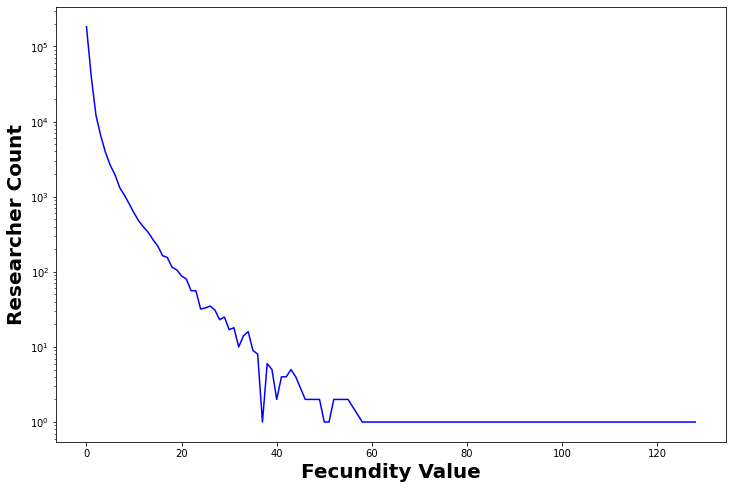

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 55, 58, 62, 63, 66, 128)
(183280, 39867, 12050, 6471, 3887, 2614, 1960, 1316, 1043, 800, 607, 474, 394, 334, 267, 220, 164, 155, 115, 106, 88, 80, 56, 56, 32, 33, 35, 31, 23, 25, 17, 18, 10, 14, 16, 9, 8, 1, 6, 5, 2, 4, 4, 5, 4, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1)


In [22]:
draw_line_graph(out_dgr_dist, title='',ylabel='Researcher Count',xlabel='Fecundity Value',loc="../new_graphs/FecundityDistributionLine1.svg")

In [1]:
#out_dgr_dist

<h2> Fertility: </h2>

In [48]:
#len([k for k, v in graph1.out_degree(graph1.successors(1234)) if v > 0])

In [25]:
fertile=fertility_calculation(graph1)

In [50]:
#save_obj('fertility_dist',fertile)

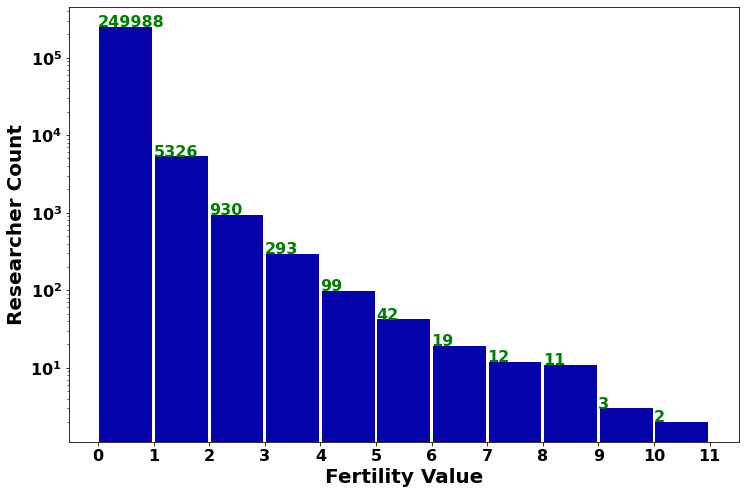

[2.49988e+05 5.32600e+03 9.30000e+02 2.93000e+02 9.90000e+01 4.20000e+01
 1.90000e+01 1.20000e+01 1.10000e+01 3.00000e+00 2.00000e+00]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [63]:
draw_bar_graph(list(fertile.values()),title='',ylabel='Researcher Count',xlabel='Fertility Value',loc="../"+save_dir+"/FertilityDistributionHist1.pdf",bins=11, text=True, print_bin=True)

In [26]:
fertile_dist = Counter(fertile.values())

In [65]:
fertility_sorted=dict(sorted(fertile.items(), key=lambda item : item[1], reverse=True))

In [67]:
top_5_fert = list(fertility_sorted.keys())[:top]

In [71]:
top_5_fert_values = list(fertility_sorted.values())[:top]

In [72]:
top_5_fert_values

[11, 10, 9, 9, 9]

In [69]:
top_5_detail = get_names_inst_dept(mod_ment2,top_5_fert,'advId')

In [73]:
top_5_detail["Fertility_count"] = top_5_fert_values

In [74]:
top_5_detail = top_5_detail[["advisor_name","publisher_institution","Fertility_count"]]
print(top_5_detail.to_latex(index=False))

\begin{tabular}{llr}
\toprule
          advisor\_name &                      publisher\_institution &  Fertility\_count \\
       Hiremath, R. C. &                        Karnatak University &               11 \\
\midrule
         Hariharan, S. &                   Bharathidasan University &               10 \\
              S, Mohan &  University of Madras; Alagappa University &                9 \\
    Thirumalaisamy, R. &                        Alagappa University &                9 \\
 Shanmuga, Sundaram S. &                         Periyar University &                9 \\
\bottomrule
\end{tabular}



In [75]:
#save_df("researcher_fertility", top_5_detail)

In [59]:
#mod_ment2[mod_ment2['resId']==137564]

In [60]:
#mod_ment2[mod_ment2['advId']==93541]

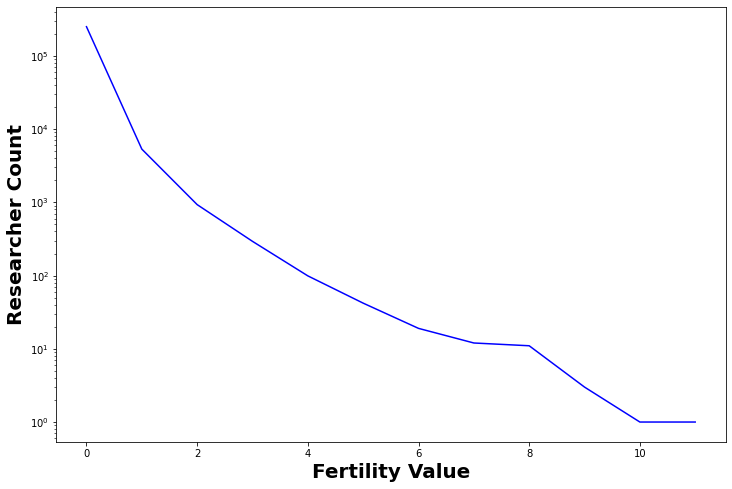

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
(249988, 5326, 930, 293, 99, 42, 19, 12, 11, 3, 1, 1)


In [27]:
draw_line_graph(fertile_dist,title='',ylabel='Researcher Count',xlabel='Fertility Value',loc="../new_graphs/FertilityDistributionLine1.svg")

<h2> Decendants Calculation : </h2>

In [163]:
# def draw_bar_graph(metric_value_list,title='Fecundity Distribution',ylabel='Researcher Count',xlabel='Fecundity Value',bins=10, loc="../new_graphs/hist", text=False, print_bin=False):
#     #counts, bins = np.histogram(metric_value_list)
#     plt.figure(figsize=(12,8))
#     ax = plt.axes()
#     n,bins,container=plt.hist(metric_value_list, bins=bins,color='#0504aa',density=False,log=True,rwidth=0.95)#  alpha=0.7
#     #plt.hist(deg, color="b", bins=bin_size)
#     plt.yticks(fontsize=10,fontweight='bold')
#     plt.xticks(fontsize=10,fontweight='bold')
#     plt.title(title)
#     plt.ylabel(ylabel,fontweight='bold', fontsize=20) #fontsize=18
#     plt.xlabel(xlabel,fontweight='bold', fontsize=20)
#     if text:
#         for i,v in zip(bins[0:-1], n):
#             if v > 0:
#                 plt.text(i, v, str(int(v)), color='green', fontweight='bold',fontsize=16)
#     if print_bin:
#         ax.set_xticks([int(d) for d in bins])
#         ax.set_xticklabels([int(b) for b in bins])
#     #plt.xticks(bins[0::5])
#     plt.savefig(loc,bbox_inches='tight')
#     plt.show()
#     print(n)
#     print(bins)
#     return

In [28]:
desc_dist=desc_calculation(graph1)

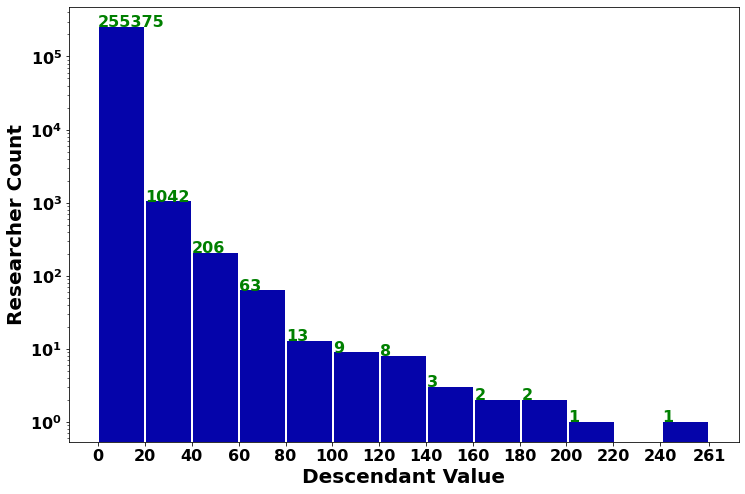

[2.55375e+05 1.04200e+03 2.06000e+02 6.30000e+01 1.30000e+01 9.00000e+00
 8.00000e+00 3.00000e+00 2.00000e+00 2.00000e+00 1.00000e+00 0.00000e+00
 1.00000e+00]
[  0.          20.07692308  40.15384615  60.23076923  80.30769231
 100.38461538 120.46153846 140.53846154 160.61538462 180.69230769
 200.76923077 220.84615385 240.92307692 261.        ]


In [80]:
draw_bar_graph(list(desc_dist.values()),title='',ylabel='Researcher Count',xlabel='Descendant Value',loc="../"+save_dir+"/DescendantsDistributionHist1.pdf", bins=13, text=True, print_bin=True)

In [29]:
desc_dist_val = Counter(desc_dist.values())

In [82]:
sorted_desc=dict(sorted(desc_dist.items(), key=lambda x: x[1], reverse=True))

In [83]:
top_5_desc = list(sorted_desc.keys())[:top]

In [85]:
top_5_desc_values = list(sorted_desc.values())[:top]

In [86]:
top_5_detail=get_names_inst_dept(mod_ment2,top_5_desc,'advId')

In [87]:
top_5_detail["Descendant_count"] = top_5_desc_values

In [90]:
top_5_detail

,advisor_name,publisher_institution,publisher_dept,Descendant_count
advId,,,,
24794,"Shivarudrappa, G.",Karnatak University,department of education,261
144109,"S, Mohan",University of Madras; Alagappa University,department of engineering education; departmen...,219
85392,"Handemath, S. C.",Karnatak University,department of kannada,194
85237,"Hiremath, R. C.",Karnatak University,department of kannada; department of linguistics,193
89320,"Ramasamy, P.",Anna University,faculty of science and humanities,166


In [88]:
#save_df("researcher_descendants", top_5_detail)

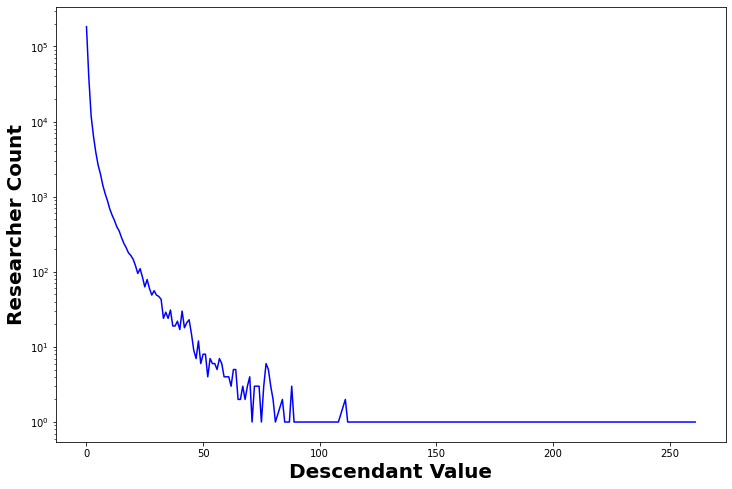

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 87, 88, 89, 92, 93, 94, 98, 101, 102, 105, 108, 111, 112, 115, 119, 122, 123, 124, 128, 129, 131, 135, 139, 143, 146, 149, 163, 166, 193, 194, 219, 261)
(183280, 38296, 11818, 6354, 3895, 2623, 2000, 1420, 1098, 883, 684, 566, 482, 398, 350, 287, 240, 210, 179, 165, 147, 121, 95, 110, 85, 63, 79, 60, 49, 56, 49, 47, 43, 24, 29, 24, 31, 19, 19, 22, 17, 30, 18, 21, 23, 15, 9, 7, 12, 6, 8, 8, 4, 7, 6, 6, 5, 7, 6, 4, 4, 4, 3, 5, 5, 2, 2, 3, 2, 3, 4, 1, 3, 3, 3, 1, 3, 6, 5, 3, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


In [30]:
draw_line_graph(desc_dist_val,title='',ylabel='Researcher Count',xlabel='Descendant Value',loc="../new_graphs/DescendantsDistributionLine1.svg")

In [71]:
#plt.savefig('hartford_degree_distribution.pdf')
#plt.show()

In [91]:
top_5_detail = top_5_detail[["advisor_name","publisher_institution","Descendant_count"]]
print(top_5_detail.to_latex(index=False))

\begin{tabular}{llr}
\toprule
      advisor\_name &                      publisher\_institution &  Descendant\_count \\
 Shivarudrappa, G. &                        Karnatak University &               261 \\
\midrule
          S, Mohan &  University of Madras; Alagappa University &               219 \\
  Handemath, S. C. &                        Karnatak University &               194 \\
   Hiremath, R. C. &                        Karnatak University &               193 \\
      Ramasamy, P. &                            Anna University &               166 \\
\bottomrule
\end{tabular}



<h2> Cousine Calculation :</h2>

In [31]:
cousin_dict=cousins(graph1)

In [32]:
cousin_dist = Counter(cousin_dict.values())

In [33]:
#cousin_dist

In [34]:
top=5

In [35]:
sorted_cousin=dict(sorted(cousin_dict.items(), key=lambda x: x[1], reverse=True))

In [49]:
top_5_cousin = list(sorted_cousin.keys())[:top]

In [50]:
top_5_cousin_values = list(sorted_cousin.values())[:top]

In [51]:
top_5_detail=get_names_inst_dept(mod_ment2, top_5_cousin, 'resId',cols=['researcher_name','publisher_institution','publisher_dept'])
top_5_detail

,researcher_name,publisher_institution,publisher_dept
resId,,,
121605,"Ray, Debdutta",Jawaharlal Nehru University,school of social sciences
144110,"Jagadeesh, D H.",Karnatak University,department of education
144144,"Sattigeri, K I.",Karnatak University,department of education
144097,"Vijayalakshmi, N.",Karnatak University,department of education
144099,"Desai, Shantadevi S.",Karnatak University,department of education


In [52]:
top_5_detail['Cousin_count'] = top_5_cousin_values
top_5_detail = top_5_detail[["researcher_name","publisher_institution","Cousin_count"]]
print(top_5_detail.to_latex(index=False))

\begin{tabular}{llr}
\toprule
      researcher\_name &        publisher\_institution &  Cousin\_count \\
        Ray, Debdutta &  Jawaharlal Nehru University &           149 \\
\midrule
      Jagadeesh, D H. &          Karnatak University &           148 \\
      Sattigeri, K I. &          Karnatak University &           148 \\
    Vijayalakshmi, N. &          Karnatak University &           146 \\
 Desai, Shantadevi S. &          Karnatak University &           146 \\
\bottomrule
\end{tabular}



In [53]:
#save_df("researcher_cousin", top_5_detail)

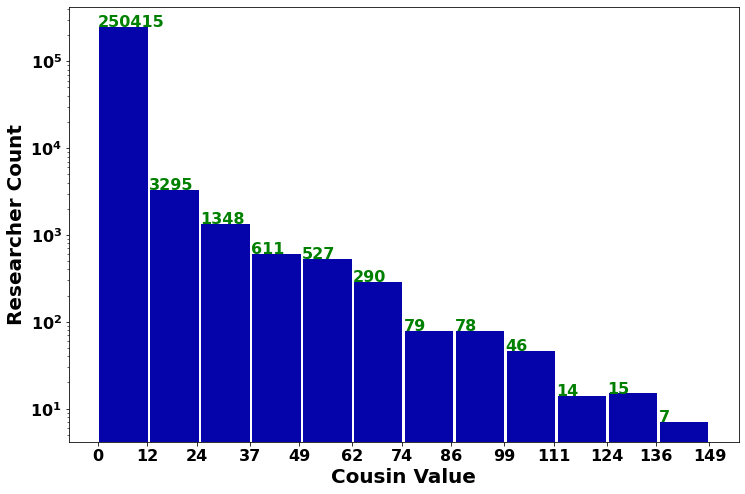

[2.50415e+05 3.29500e+03 1.34800e+03 6.11000e+02 5.27000e+02 2.90000e+02
 7.90000e+01 7.80000e+01 4.60000e+01 1.40000e+01 1.50000e+01 7.00000e+00]
[  0.          12.41666667  24.83333333  37.25        49.66666667
  62.08333333  74.5         86.91666667  99.33333333 111.75
 124.16666667 136.58333333 149.        ]


In [62]:
draw_bar_graph(list(cousin_dict.values()),title='',ylabel='Researcher Count',xlabel='Cousin Value',loc="../"+save_dir+"/CousineDistributionHist1.pdf",bins=12,text=True, print_bin=True)

In [82]:
cousin_dict[121605]

149

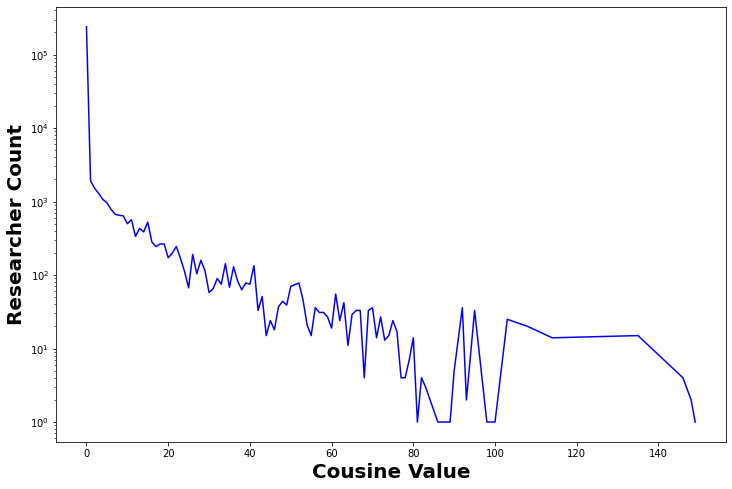

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 89, 90, 92, 93, 95, 98, 100, 103, 108, 114, 135, 146, 148, 149)
(239520, 1915, 1510, 1286, 1071, 964, 785, 672, 649, 640, 499, 568, 336, 431, 387, 525, 282, 244, 265, 265, 172, 198, 245, 169, 112, 67, 191, 104, 159, 115, 58, 65, 90, 75, 143, 68, 130, 83, 63, 78, 75, 134, 33, 51, 15, 24, 18, 37, 44, 39, 70, 74, 78, 46, 21, 15, 36, 31, 31, 27, 19, 55, 24, 42, 11, 29, 33, 33, 4, 33, 36, 14, 27, 13, 15, 24, 17, 4, 4, 7, 14, 1, 4, 3, 1, 1, 5, 36, 2, 33, 1, 1, 25, 20, 14, 15, 4, 2, 1)


In [36]:
draw_line_graph(cousin_dist,title='',ylabel='Researcher Count',xlabel='Cousine Value',loc="../new_graphs/CousineDistributionLine1.svg")

<h2> Generation Calculation : </h2>

In [84]:
#graph1.has_edge( 18773,18760)

In [37]:
gen_dict=Generation(graph1)

completed :0 nodes
completed :100000 nodes
completed :200000 nodes


In [38]:
gen_dist = Counter(gen_dict.values())

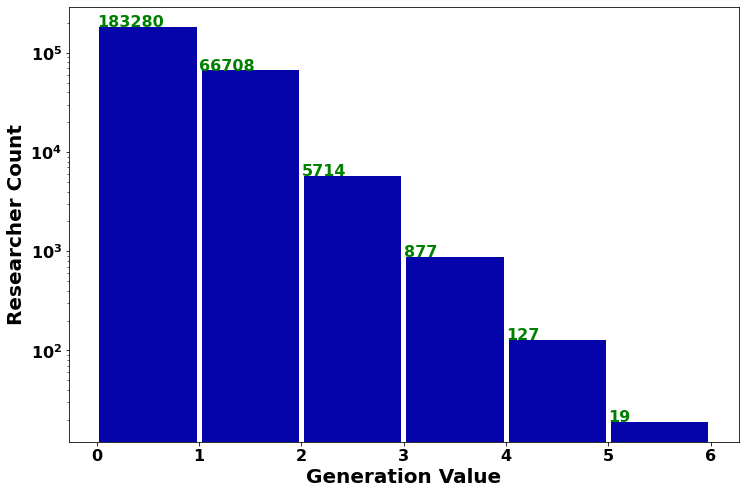

[1.8328e+05 6.6708e+04 5.7140e+03 8.7700e+02 1.2700e+02 1.9000e+01]
[0. 1. 2. 3. 4. 5. 6.]


In [41]:
draw_bar_graph(list(gen_dict.values()),title='',ylabel='Researcher Count',xlabel='Generation Value',bins=6,loc="../"+save_dir+"/GenerationDistributionHist1.pdf",text=True, print_bin=True)

In [108]:
sorted_gen = dict(sorted(gen_dict.items(), key=lambda x :  x[1], reverse=True))

In [109]:
top_5_gen = list(sorted_gen.keys())[:top]

In [111]:
top_5_gen_values = list(sorted_gen.values())[:top]

In [110]:
top_5_detail=get_names_inst_dept(mod_ment2, top_5_gen, 'advId')
top_5_detail

,advisor_name,publisher_institution,publisher_dept
advId,,,
3119,"Ramakrishnan, S. S.",Bharathiar University,department of metallurgical engineering; depar...
100228,Balusamy V.,Anna University,faculty of mechanical engineering
9707,"Sharma, Mohinder",Himachal Pradesh University,department of business administration
9710,"Sharma, Usha",Himachal Pradesh University,department of business administration
14047,"Rath, Satyajit",Jawaharlal Nehru University,department of national institute of immunology


In [113]:
top_5_detail['Generation_count'] = top_5_gen_values
top_5_detail = top_5_detail[["advisor_name","publisher_institution","Generation_count"]]
print(top_5_detail.to_latex(index=False))

\begin{tabular}{llr}
\toprule
        advisor\_name &        publisher\_institution &  Generation\_count \\
 Ramakrishnan, S. S. &        Bharathiar University &                 6 \\
\midrule
         Balusamy V. &              Anna University &                 5 \\
    Sharma, Mohinder &  Himachal Pradesh University &                 5 \\
        Sharma, Usha &  Himachal Pradesh University &                 5 \\
      Rath, Satyajit &  Jawaharlal Nehru University &                 5 \\
\bottomrule
\end{tabular}



In [114]:
#save_df("researcher_generation", top_5_detail)

In [116]:
#gen_dict[50909]

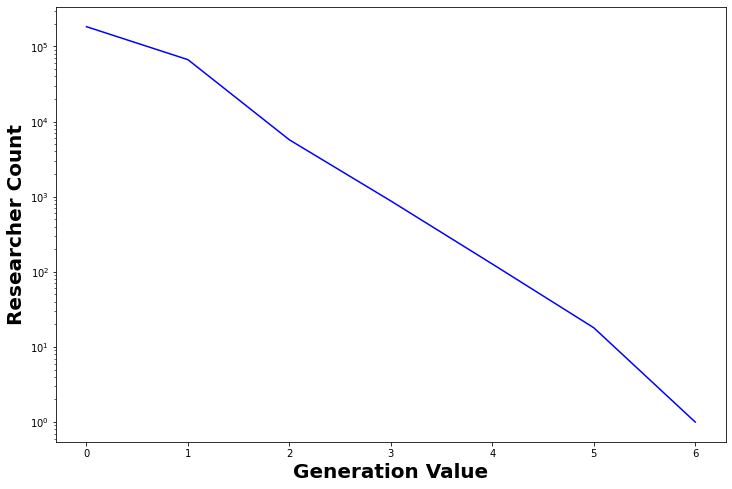

(0, 1, 2, 3, 4, 5, 6)
(183280, 66708, 5714, 877, 127, 18, 1)


In [39]:
draw_line_graph(gen_dist,title='',ylabel='Researcher Count',xlabel='Generation Value',loc="../new_graphs/GenerationDistributionLine1.svg")

In [119]:
#gen_dist

<h2> H-index Calculation : </h2>

In [96]:
#[deg for n ,deg in graph1.out_degree(list(graph1.successors(24794)))]

In [40]:
hindex_dict=child_deg(graph1)
hindex_dict={key: int(hindex_dict[key]) for key in hindex_dict}

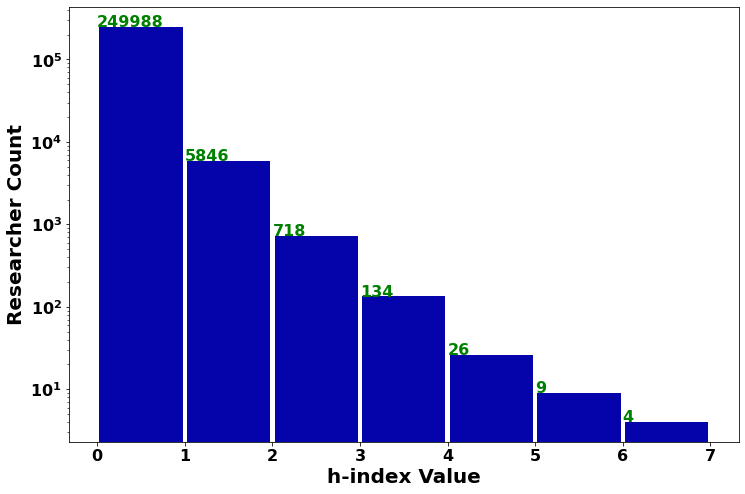

[2.49988e+05 5.84600e+03 7.18000e+02 1.34000e+02 2.60000e+01 9.00000e+00
 4.00000e+00]
[0. 1. 2. 3. 4. 5. 6. 7.]


In [121]:
draw_bar_graph(list(hindex_dict.values()),title='',ylabel='Researcher Count',xlabel='h-index Value',loc="../"+save_dir+"/H-indexDistributionHist1.pdf",bins=7,text=True, print_bin=True)

In [99]:
#draw_bar_graph(list(hindex_dict.values()),title='H-index Distribution',ylabel='Researcher Count',xlabel='H-index Value')

In [122]:
#save_obj('hindex_dict',hindex_dict)

In [123]:
sorted_hindex=dict(sorted(hindex_dict.items(), key= lambda x : x[1], reverse=True))

In [42]:
hindex_dist = Counter(hindex_dict.values())

In [170]:
top_5_hindex = list(sorted_hindex.keys())[:top]

In [171]:
top_5_hindex_values = list(sorted_hindex.values())[:top]

In [172]:
top_5_detail=get_names_inst_dept(mod_ment2, top_5_hindex, 'advId')
top_5_detail

,advisor_name,publisher_institution,publisher_dept
advId,,,
63216,"Kurup, Pa",University of Kerala,department of biochemistry
48103,"Shanmuga, Sundaram S.",Periyar University,department of commerce
73063,"Meti, T. K.",Karnatak University,department of economics
85237,"Hiremath, R. C.",Karnatak University,department of kannada; department of linguistics
22565,"Ghosh, Asok",University of Calcutta,department of zoology; department of science


In [175]:
top_5_detail['h-index_count'] = top_5_hindex_values
top_5_detail = top_5_detail[["advisor_name","publisher_institution","h-index_count"]]
print(top_5_detail.to_latex(index=False))

\begin{tabular}{llr}
\toprule
          advisor\_name &   publisher\_institution &  h-index\_count \\
             Kurup, Pa &    University of Kerala &              7 \\
\midrule
 Shanmuga, Sundaram S. &      Periyar University &              6 \\
           Meti, T. K. &     Karnatak University &              6 \\
       Hiremath, R. C. &     Karnatak University &              6 \\
           Ghosh, Asok &  University of Calcutta &              5 \\
\bottomrule
\end{tabular}



In [127]:
#save_df("researcher_h-index", top_5_detail)

In [107]:
#mod_ment2[mod_ment2['advId']==63216]

In [129]:
#hindex_dist

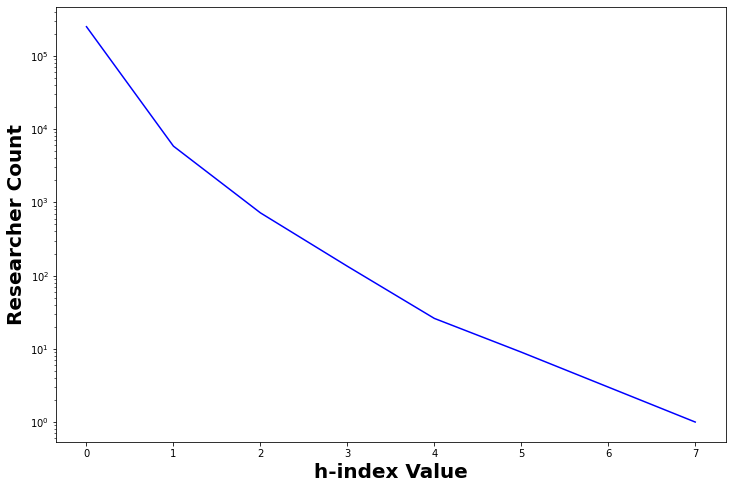

(0, 1, 2, 3, 4, 5, 6, 7)
(249988, 5846, 718, 134, 26, 9, 3, 1)


In [43]:
draw_line_graph(hindex_dist,title='',ylabel='Researcher Count',xlabel='h-index Value',loc="../new_graphs/H-indexDistributionLine1.svg")

In [110]:
# hindex_dict[3607]

## G_m - index

In [111]:
#[deg for n ,deg in graph1.out_degree(list(graph1.successors(24794)))]

In [44]:
gm_index=gm_index_mod(graph1)

In [45]:
gm_index[24794]

12

In [114]:
# for k in gm_index:
#     if gm_index[k]==9:
#         print(k)

In [134]:
#save_obj('gindex_dict',gm_index)

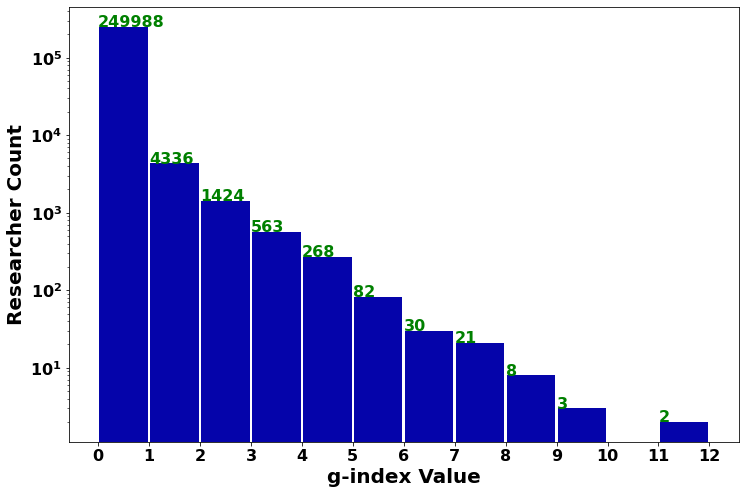

[2.49988e+05 4.33600e+03 1.42400e+03 5.63000e+02 2.68000e+02 8.20000e+01
 3.00000e+01 2.10000e+01 8.00000e+00 3.00000e+00 0.00000e+00 2.00000e+00]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [135]:
draw_bar_graph(list(gm_index.values()),title='',ylabel='Researcher Count',xlabel='g-index Value',bins=12,loc="../"+save_dir+"/G-indexDistributionHist1.pdf",text=True, print_bin=True)

In [46]:
sorted_gindex=dict(sorted(gm_index.items(), key=lambda x : x[1], reverse=True))

In [137]:
top_5_gindex = list(sorted_gindex.keys())[:top]

In [142]:
top_5_gindex_values = list(sorted_gindex.values())[:top]

In [143]:
top_5_detail=get_names_inst_dept(mod_ment2, top_5_gindex, 'advId')
top_5_detail

,advisor_name,publisher_institution,publisher_dept
advId,,,
24794,"Shivarudrappa, G.",Karnatak University,department of education
65471,"Rao, S. Brahmaji",Sri Krishnadevaraya University,department of chemistry
48103,"Shanmuga, Sundaram S.",Periyar University,department of commerce
58479,"Pawar, S. H.",Shivaji University,department of physics
73063,"Meti, T. K.",Karnatak University,department of economics


In [144]:
top_5_detail['g-index_count'] = top_5_gindex_values
top_5_detail = top_5_detail[["advisor_name","publisher_institution","g-index_count"]]
print(top_5_detail.to_latex(index=False))

\begin{tabular}{llr}
\toprule
          advisor\_name &           publisher\_institution &  g-index\_count \\
     Shivarudrappa, G. &             Karnatak University &             12 \\
\midrule
      Rao, S. Brahmaji &  Sri Krishnadevaraya University &             11 \\
 Shanmuga, Sundaram S. &              Periyar University &              9 \\
          Pawar, S. H. &              Shivaji University &              9 \\
           Meti, T. K. &             Karnatak University &              9 \\
\bottomrule
\end{tabular}



In [146]:
#save_df("researcher_g-index", top_5_detail)

In [48]:
gindex_dist = Counter(gm_index.values())

In [148]:
#gindex_dist

In [123]:
#gindex_dist

In [149]:
#top_5_gm

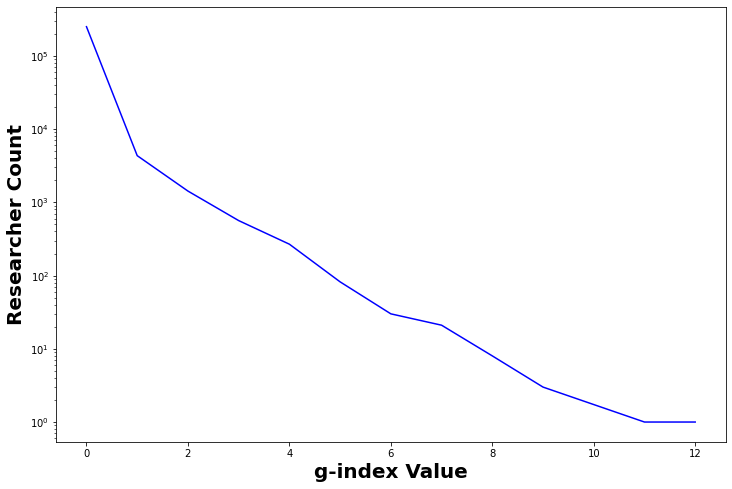

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)
(249988, 4336, 1424, 563, 268, 82, 30, 21, 8, 3, 1, 1)


In [49]:
draw_line_graph(gindex_dist,title='',ylabel='Researcher Count',xlabel='g-index Value',loc="../new_graphs/G-indexDistributionLine1.svg")

In [151]:
gm_index[24794]

12

<h2> In-Degree Calculation : </h2>

In [152]:
in_dgr = graph1.in_degree()

In [153]:
in_dgr=dict(in_dgr)

In [154]:
in_dgr_dist = Counter(in_dgr.values())

In [155]:
in_sort=sorted(in_dgr_dist.items())

In [156]:
sorted_in=dict(sorted(in_dgr.items(), key=lambda x : x[1], reverse=True))

In [158]:
top_5_in = list(sorted_in.keys())[:top]

In [157]:
top_5_in_values = list(sorted_in.values())[:top]

In [159]:
top_5_detail=get_names_inst_dept(mod_ment2, top_5_in, 'resId',cols=['researcher_name','publisher_institution','publisher_dept'])
top_5_detail

,researcher_name,publisher_institution,publisher_dept
resId,,,
97751,"Gupta, Priyanka",Bundelkhand University,department of maharani laxmi bai medical college
97781,"Bhadauria, Kaushlenrdra Singh",Bundelkhand University,department of maharani laxmi bai medical college
97827,"Roy, Gouri",Bundelkhand University,department of maharani laxmi bai medical college
97753,Archana,Bundelkhand University,department of maharani laxmi bai medical college
97678,"Singh, Chandra Bhal",Bundelkhand University,department of maharani laxmi bai medical college


In [161]:
top_5_detail["Parent_count"] =  top_5_in_values

In [162]:
top_5_detail = top_5_detail[["researcher_name","publisher_institution","Parent_count"]]
print(top_5_detail.to_latex(index=False))

\begin{tabular}{llr}
\toprule
               researcher\_name &   publisher\_institution &  Parent\_count \\
               Gupta, Priyanka &  Bundelkhand University &             6 \\
\midrule
 Bhadauria, Kaushlenrdra Singh &  Bundelkhand University &             4 \\
                    Roy, Gouri &  Bundelkhand University &             4 \\
                       Archana &  Bundelkhand University &             4 \\
           Singh, Chandra Bhal &  Bundelkhand University &             4 \\
\bottomrule
\end{tabular}



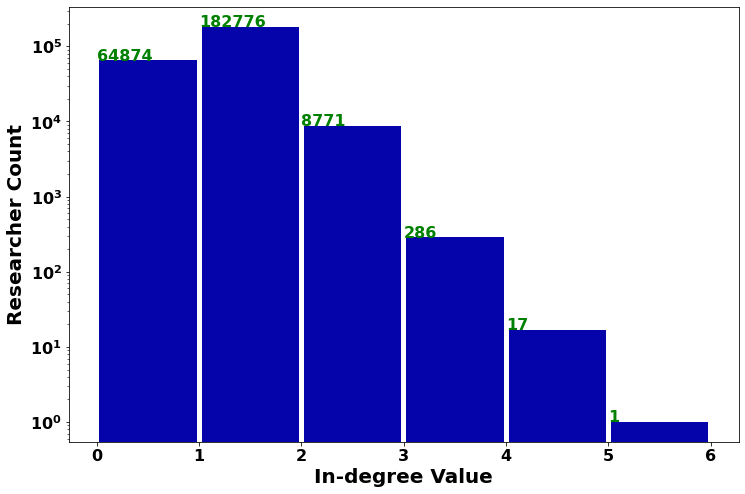

[6.48740e+04 1.82776e+05 8.77100e+03 2.86000e+02 1.70000e+01 1.00000e+00]
[0. 1. 2. 3. 4. 5. 6.]


In [167]:
draw_bar_graph(list(in_dgr.values()),title='',ylabel='Researcher Count',xlabel='In-degree Value', bins=6, loc="../"+save_dir+"/inDegreeDistributionHist1.pdf",text=True, print_bin=True)

In [168]:
draw_line_graph(in_dgr_dist,title='', ylabel='Researcher Count', xlabel='In-degree Value', loc="../new_graphs/inDegreeDistributionLine1.svg")

In [139]:
#influential=nx.voterank(graph1, 20)

In [140]:
#influential  #[144109, 88147, 30812, 88166, 26894]

<h2> Betweeness Centrality Considering the Connected Components </h2>

In [141]:
# bw_cent=[]
# for com in nx.weakly_connected_components(graph1):
#     subgraph = graph1.subgraph(com)
#     bcent=nx.betweenness_centrality(subgraph)
#     bcent={key:bcent[key]*len(com) for key in bcent}
#     bw_cent.append(list(bcent.items()))

In [142]:
# bw_cent_tuple=[ele for eles in bw_cent for ele in eles]
# bw_cent_dict=dict(bw_cent_tuple)

In [143]:
# top5_bw_cent=sorted(bw_cent_dict, key=bw_cent_dict.get, reverse=True)[:5]

In [144]:
# top5_bw_cent

In [145]:
# top_5_detail=get_names_inst_dept(mod_ment2, top5_bw_cent, 'advId')
# top_5_detail

In [146]:
#mod_ment2[mod_ment2['advId']==30260]

In [147]:
#mod_ment2[mod_ment2['advId']==30249].shape

In [148]:
#mod_ment2[mod_ment2['advId']==85237].shape

In [149]:
#sum([deg for n ,deg in graph1.out_degree(list(graph1.successors(85237)))])

In [150]:
# 48103
# 58479
# 65471
# 73063
# 85237

In [151]:
#graph1.out_degree(list(graph1.successors(85237)))

In [152]:
#mod_ment2[mod_ment2['advId']==230594]['title'].values

In [153]:
#adv=mod_ment2.groupby(['advId'])['advisor_name'].apply(list).reset_index().copy()

In [154]:
#Neo4j used for finding patterns (motifs) using cypher (Query language for neo4j database)

In [155]:

# [1.83283e+05 6.70040e+04 5.73100e+03 8.85000e+02 1.28000e+02 2.20000e+01]
# # [0. 1. 2. 3. 4. 5. 6.]

In [156]:
#gen_dist

In [157]:
# import numpy as np
# np.log10(100)

In [8]:
[deg for n ,deg in graph1.out_degree(list(graph1.successors(24794)))]

[15, 4, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 0, 0, 0]

In [15]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1', 'ddc_code', 'advisor_advId',
       'researcher_resId'],
      dtype='object')

In [145]:
mod_ment2[mod_ment2["advId"]==24794]

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,...,new_date_awarded,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative,N_DepartmentId_1,ddc_code,advisor_advId,researcher_resId
54612,24794,144100,24794,24797,"Shivarudrappa, G.","Kasinath, H M.",department of education,D1418,Karnatak University,I26,...,1981-04-30,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Kasinath, H M.@24797"
54613,24794,144115,24794,24822,"Shivarudrappa, G.","Patil, B C.",department of education,D1418,Karnatak University,I26,...,1993-06-30,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Patil, B C.@24822"
54614,24794,144052,24794,24823,"Shivarudrappa, G.","Aradhya, P C.",department of education,D1418,Karnatak University,I26,...,1987-06-30,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Aradhya, P C.@24823"
54615,24794,144075,24794,144075,"Shivarudrappa, G.","Kabbur, Shivakumar",department of education,D1418,Karnatak University,I26,...,1987-06-30,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Kabbur, Shivakumar@144075"
54616,24794,144077,24794,144077,"Shivarudrappa, G.","Nath, N S Srigiri",department of education,D1418,Karnatak University,I26,...,1979-05-30,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Nath, N S Srigiri@144077"
54617,24794,144079,24794,144079,"Shivarudrappa, G.","Vasanta, A.",department of education,D1418,Karnatak University,I26,...,1989-04-20,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Vasanta, A.@144079"
54618,24794,144083,24794,144083,"Shivarudrappa, G.","Sayed, Nurjehan A.",department of education,D1418,Karnatak University,I26,...,1987-06-30,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Sayed, Nurjehan A.@144083"
54619,24794,144084,24794,144084,"Shivarudrappa, G.","Soundaravalli, S.",department of education,D1418,Karnatak University,I26,...,1985-06-30,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Soundaravalli, S.@144084"
54620,24794,144086,24794,144086,"Shivarudrappa, G.","Hemambujam, K.",department of education,D1418,Karnatak University,I26,...,1984-06-30,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Hemambujam, K.@144086"
54621,24794,144088,24794,144088,"Shivarudrappa, G.","Yeli, R S.",department of education,D1418,Karnatak University,I26,...,1980-01-31,NaN,300::Social sciences|370::Education,"('300', '370')",NaN,NaN,D1418,"('300', '370')","Shivarudrappa, G.@24794","Yeli, R S.@144088"
